# Mínimos cuadrados
**Nota:** Los siguientes ejercicios están basados en las notas de clase disponibles en: https://github.com/ITAM-DS/Propedeutico/blob/master/Python/clases/3_algebra_lineal/3_minimos_cuadrados.ipynb

## Ejercicio 4:

Ajusta por mínimos cuadrados dos modelos de la forma:<br><br>
**Modelo 1:** $log(y)=log(b)+alog(x)$<br>
**Modelo 2:** $log(y)=log(b)+alog(x)+clog(x)^{2}$ 
<br><br>
Realizar una gráfica que involucre los datos y los tres modelos. Calcula el $ECM$ de ambos modelos y responde, ¿cuál es el modelo con menor $ECM$?


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import pprint
np.set_printoptions(precision = 4)

In [122]:
# Calculo del ECM
def cal_ecm(y, yhat): 
    ecm = 0
    for a, b in zip(y,yhat):
        resid_sq = (a-b)**2
        ecm += resid_sq
    return ecm

In [123]:
# importar la base de datos y disponible en: https://drive.google.com/file/d/1cnrwEqDmkJBKxkobDEMad7-RIoozEqCJ/view
datos = np.loadtxt('datos_para_tarea_minimos_cuadrados.txt', skiprows=1)
y_o = datos[:, 1]
y = np.log(y_o)
x = datos[:, 0]
mpoints, = x.shape

## Modelo 1
Considere el modelo 1, expresado a continuación:
$$log(y)=log(b)+alog(x)$$
<br>
Note que estimar el anterior modelo, es equivalente a estimar la siguiente ecuación:
$$y = bx^{a}$$ 
<br>

In [124]:
# Modelo 1
log_tnsf = lambda x: np.log(x)

A_m1 = np.ones((mpoints, 2))
A_m1[:, 1] = np.log(x)

Q_m1,R_m1 = np.linalg.qr(A_m1) 
beta_m1 = np.linalg.solve(R_m1, Q_m1.T@y) 
yhat_m1 = A_m1@beta_m1

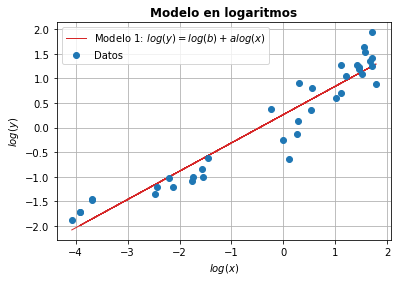

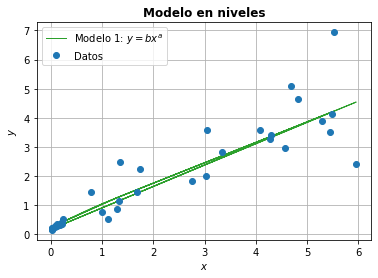

In [130]:
# Gráfica
plt.plot(np.log(x), yhat_m1,'-', color='tab:red', linewidth=1.0) # yhat(log(x))
plt.plot(np.log(x), np.log(y_o),'o', color='tab:blue') # logy(log(x))
plt.legend(('Modelo 1: $log(y)=log(b)+alog(x)$', 'Datos'), loc='best')
plt.xlabel('$log(x)$'); plt.ylabel('$log(y)$')
plt.title('Modelo en logaritmos', fontweight='bold')
plt.grid(True)

plt.show()

# en niveles
plt.plot(x, np.exp(yhat_m2),'-', color='tab:green', linewidth=1.0) # yhat(log(x))
plt.plot(x, y_o,'o', color='tab:blue') # logy(log(x))
plt.legend((f"Modelo 1: $y = bx^a$", 'Datos'), loc='best')
plt.xlabel('$x$'); plt.ylabel('$y$')
plt.title('Modelo en niveles', fontweight='bold')
plt.grid(True)

plt.show()

## Modelo 2
Considere el modelo 1, expresado a continuación:
$$log(y)=log(b)+alog(x)+c(log(x))^{2}$$
<br>
Note que estimar el anterior modelo, es equivalente a estimar la siguiente ecuación:
$$y=bx^{a}e^{clog^{2}(x)}$$
<br>

In [112]:
# Modelo 2
log_cuad = lambda x: (np.log(x))**2

A_m2 = np.ones((mpoints, 3))
A_m2[:, 1] = np.log(x)
A_m2[:, 2] = (np.log(x))**2

Q_m2,R_m2 = np.linalg.qr(A_m2) 
beta_m2 = np.linalg.solve(R_m2, Q_m2.T@y)
yhat_m2 = A_m2@beta_m2
b_m2, a_m2, c_m2 = beta_m2

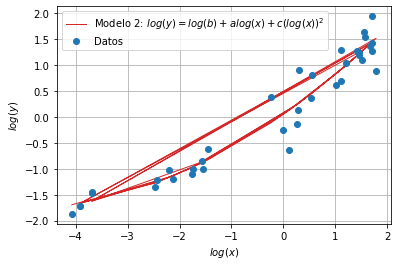

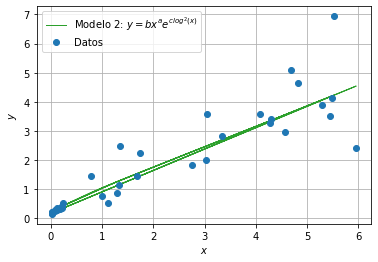

In [135]:
# Gráfica
plt.plot(np.log(x), yhat_m2,'-', color='tab:red', linewidth=1.0) # yhat(log(x))
plt.plot(np.log(x), np.log(y_o),'o', color='tab:blue') # logy(log(x))
plt.legend((f"Modelo 2: $log(y)=log(b)+alog(x)+c(log(x))^{2}$", 'Datos'), loc='best')
plt.xlabel('$log(x)$'); plt.ylabel('$log(y)$')
plt.grid(True)

plt.show()

# en niveles
plt.plot(x, np.exp(yhat_m2),'-', color='tab:green', linewidth=1.0) # yhat(log(x))
plt.plot(x, y_o,'o', color='tab:blue') # logy(log(x))
plt.legend(('Modelo 2: $y=bx^{a}e^{clog^{2}(x)}$', 'Datos'), loc='best')
plt.xlabel('$x$'); plt.ylabel('$y$')
plt.grid(True)

plt.show()

## Error cuadrático medio

In [136]:
# Menor ECM
ecm_m1 = cal_ecm(y, yhat_m1)
ecm_m2 = cal_ecm(y, yhat_m2)
ecm_mods = [ecm_m1, ecm_m2]
ecm_names = ['Modelo 1', 'Modelo 2']
ecm_mod_form = ['log(y)= log(b) + alog(x)', 'log(y)= log(b) + alog(x) + c(log(x))^2']

best_mod = np.argmin(ecm_mods)

print('-'*20) 
print(f"El menor ECM es {ecm_mods[best_mod]}")
print(f"{ecm_names[best_mod]}: {ecm_mod_form[best_mod]}")
print('-'*20)


--------------------
El menor ECM es 2.921945589096121
Modelo 2: log(y)= log(b) + alog(x) + c(log(x))^2
--------------------
